In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras as ks
from sklearn.model_selection import train_test_split

In [2]:
df1=pd.read_csv("hmnist_28_28_RGB.csv")


In [3]:
n_samples=len(df1.index)
image=np.array(df1.drop(["label"],axis=1))
images=image.reshape(n_samples,28,28,3)


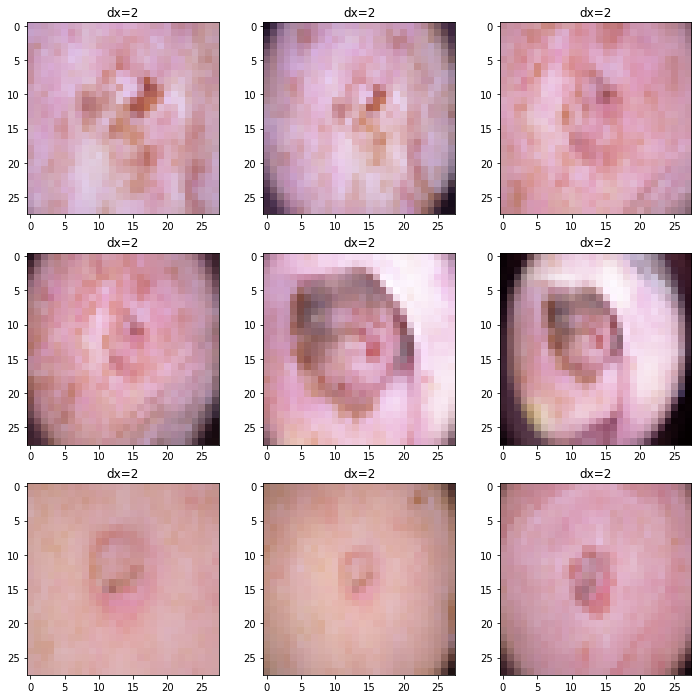

In [4]:
plt.figure(figsize=(12,12))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.axis("on")
  plt.title("dx={0}".format(df1["label"][i]))
  plt.imshow(images[i],cmap="gray_r")


In [5]:
y = df1['label']
x = df1.drop(columns = ['label'])

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [7]:
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=0.2,random_state=1)

In [8]:
x_train

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
316,152,123,128,149,112,112,145,100,97,151,...,122,150,121,121,143,112,111,141,113,113
517,180,130,145,182,135,146,182,137,151,184,...,146,175,138,146,171,132,138,163,123,128
4648,223,126,149,225,126,151,226,130,154,230,...,166,232,168,165,230,166,164,225,161,161
9780,174,121,116,184,141,148,202,175,182,202,...,163,188,152,150,184,149,148,185,152,151
5217,222,134,130,226,140,145,225,137,142,224,...,110,197,113,100,197,117,107,197,118,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,236,156,171,238,159,176,236,154,172,236,...,155,228,153,151,225,153,154,227,160,164
3685,202,125,161,202,123,162,202,121,162,205,...,155,196,129,146,196,129,151,196,129,153
6462,224,145,172,224,142,170,224,142,170,228,...,153,209,138,150,207,133,148,208,138,152
3304,244,175,188,244,173,186,244,173,187,245,...,171,227,159,169,224,157,162,222,154,158


In [9]:
unique,counts=np.unique(y_train,return_counts=True)
dict(zip(unique,counts))

{0: 216, 1: 329, 2: 701, 3: 60, 4: 4294, 5: 83, 6: 726}

In [10]:
unique,counts=np.unique(y_test,return_counts=True)
dict(zip(unique,counts))

{0: 61, 1: 96, 2: 228, 3: 37, 4: 1327, 5: 32, 6: 222}

In [11]:
#overersampling
from imblearn.over_sampling import RandomOverSampler

In [12]:
oversample = RandomOverSampler()
x_over, y_over = oversample.fit_resample(x_train,y_train)


In [13]:
unique,counts=np.unique(y_over,return_counts=True)
dict(zip(unique,counts))

{0: 4294, 1: 4294, 2: 4294, 3: 4294, 4: 4294, 5: 4294, 6: 4294}

In [14]:
unique,counts=np.unique(y_valid,return_counts=True)
dict(zip(unique,counts))

{0: 50, 1: 89, 2: 170, 3: 18, 4: 1084, 5: 27, 6: 165}

In [15]:
n_samples=len(x_over)
image=np.array(x_over)
images_x_train=image.reshape(n_samples,28,28,3)


In [16]:
n_samples=len(x_test)
image=np.array(x_test)
images_x_test=image.reshape(n_samples,28,28,3)


In [17]:
n_samples=len(x_valid)
image=np.array(x_valid)
images_x_valid=image.reshape(n_samples,28,28,3)


In [18]:
x_train_normalize = images_x_train / 255
x_test_normalize = images_x_test / 255
x_valid_normalize = images_x_valid/ 255

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D,BatchNormalization,Dropout

In [42]:
model = Sequential()
model.add(Conv2D(16,(3,3), activation = 'relu', padding = 'same',input_shape = (28,28,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(7,activation = 'softmax'))
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 10983     
Total params: 16,071
Trainable params: 16,071
Non-trainable params: 0
__________________________________________________

In [22]:
es=ks.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="max",
    baseline=None,
    restore_best_weights=True,
)

In [43]:
opt=ks.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'categorical_crossentropy', optimizer =opt, metrics = ['accuracy'],callbacks=es)

In [44]:
ks.regularizers.l2(0.01)

In [21]:
x_train_normalize = x_train_normalize.astype(np.float32)
x_test_normalize = x_test_normalize.astype(np.float32)
x_valid_normalize = x_valid_normalize.astype(np.float32)

In [ ]:
x_train_normalize

In [23]:
y_train_oh = to_categorical(y_over, 7)
y_valid_oh = to_categorical(y_valid, 7)

In [45]:
history = model.fit(x_train_normalize, y_train_oh, epochs =30, batch_size =32,validation_data=(x_valid_normalize,y_valid_oh),shuffle=True)
history

Train on 30058 samples, validate on 1603 samples
Epoch 1/30
30058/30058 [==============================] - 39s 1ms/sample - loss: 1.3189 - accuracy: 0.4966 - val_loss: 0.9359 - val_accuracy: 0.6351
Epoch 2/30
30058/30058 [==============================] - 38s 1ms/sample - loss: 0.9145 - accuracy: 0.6672 - val_loss: 1.0081 - val_accuracy: 0.5970
Epoch 3/30
30058/30058 [==============================] - 38s 1ms/sample - loss: 0.7361 - accuracy: 0.7406 - val_loss: 0.9526 - val_accuracy: 0.6157
Epoch 4/30
30058/30058 [==============================] - 38s 1ms/sample - loss: 0.6278 - accuracy: 0.7796 - val_loss: 0.7944 - val_accuracy: 0.7012
Epoch 5/30
30058/30058 [==============================] - 38s 1ms/sample - loss: 0.5481 - accuracy: 0.8082 - val_loss: 1.0876 - val_accuracy: 0.5820
Epoch 6/30
30058/30058 [==============================] - 38s 1ms/sample - loss: 0.4823 - accuracy: 0.8356 - val_loss: 1.1584 - val_accuracy: 0.5926
Epoch 7/30
30058/30058 [==============================] -

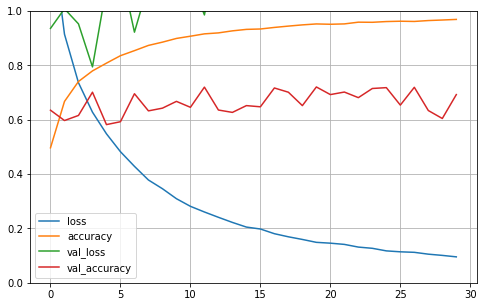

In [46]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [47]:
predictions=model.predict(x_test_normalize)
predictions

array([[6.1873943e-12, 1.6616834e-12, 4.3780888e-06, ..., 9.9999475e-01,
        4.5313574e-19, 8.3211921e-07],
       [8.0169907e-15, 2.9131612e-12, 1.8093575e-02, ..., 9.8190445e-01,
        2.0012532e-26, 2.0333027e-06],
       [2.4459737e-08, 6.1801700e-07, 1.0208107e-02, ..., 9.8979062e-01,
        2.4905431e-26, 7.3863146e-07],
       ...,
       [2.1980768e-13, 2.4531075e-06, 2.2759337e-02, ..., 9.7294348e-01,
        4.5268698e-06, 4.2901896e-03],
       [2.6547564e-06, 4.7693802e-03, 9.4262880e-01, ..., 4.2064615e-02,
        5.8496408e-09, 1.0512293e-02],
       [5.9215348e-14, 8.0127771e-05, 3.3794771e-07, ..., 9.2696649e-01,
        6.3847330e-11, 7.2953127e-02]], dtype=float32)

In [48]:
predictionst=np.argmax(predictions,axis=1)
predictionst

array([4, 4, 4, ..., 4, 2, 4])

In [30]:
y_test_array=y_test.to_numpy()
y_test_array

array([4, 4, 4, ..., 4, 2, 4])

In [49]:
accuracy = np.mean(predictionst == y_test_array)
print("Prediction Accuracy: %.2f%%" % (accuracy * 100))

Prediction Accuracy: 68.85%


In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test,predictionst))


              precision    recall  f1-score   support

           0       0.31      0.41      0.35        61
           1       0.50      0.61      0.55        96
           2       0.42      0.61      0.50       228
           3       0.59      0.43      0.50        37
           4       0.91      0.80      0.85      1327
           5       0.74      0.78      0.76        32
           6       0.40      0.43      0.41       222

    accuracy                           0.71      2003
   macro avg       0.55      0.58      0.56      2003
weighted avg       0.75      0.71      0.72      2003

